<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


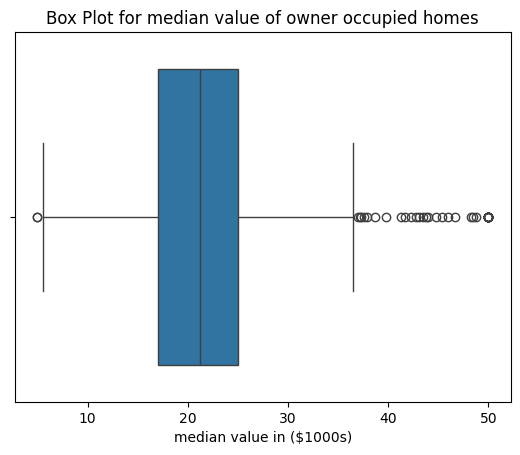

In [8]:
# boxplot for Median value of owner-occupied homes
sns.boxplot(x=boston_df['MEDV'],data=boston_df)
pyplot.title("Box Plot for median value of owner occupied homes")
pyplot.xlabel("median value in ($1000s)")
pyplot.show()

In [8]:
# Conclusion:
# Median value is around $21,000 with so many high end outliers 

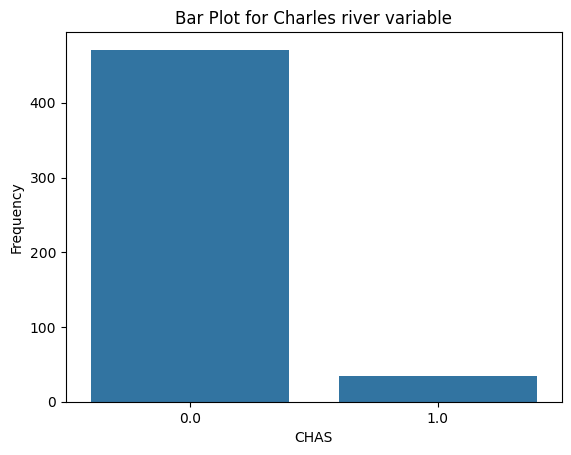

In [10]:
# bar plot for the Charles river variable
sns.countplot(x='CHAS',data=boston_df)
pyplot.title("Bar Plot for Charles river variable")
pyplot.ylabel("Frequency")
pyplot.show()

In [9]:
# Conclusion:
# very less count in CHAS with 1 means very less house which trackt bounds river

In [10]:
# boxplot for the MEDV variable vs the AGE variable by grouping age variable
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

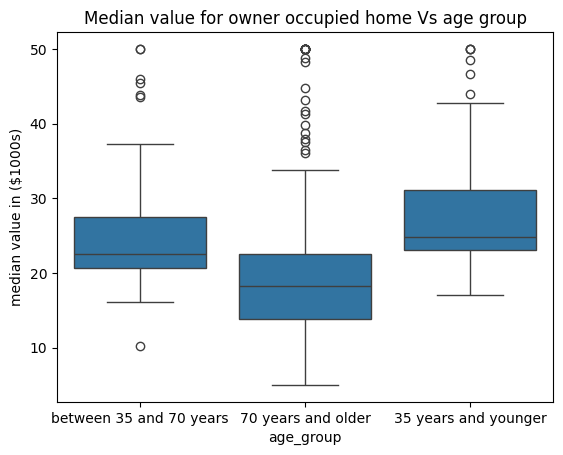

In [11]:
sns.boxplot(x=boston_df['age_group'],y=boston_df['MEDV'],data=boston_df)
pyplot.title("Median value for owner occupied home Vs age group")
pyplot.ylabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

In [12]:
# Conclusion:
# Most outlier present in agee group of 70 year and older
# Median is closer to lower IQR in age group of between 35 and 70 and also in 35 and younger suggesting assymetric distribution
# in that age group
# max value is highest for 35 and younger age group

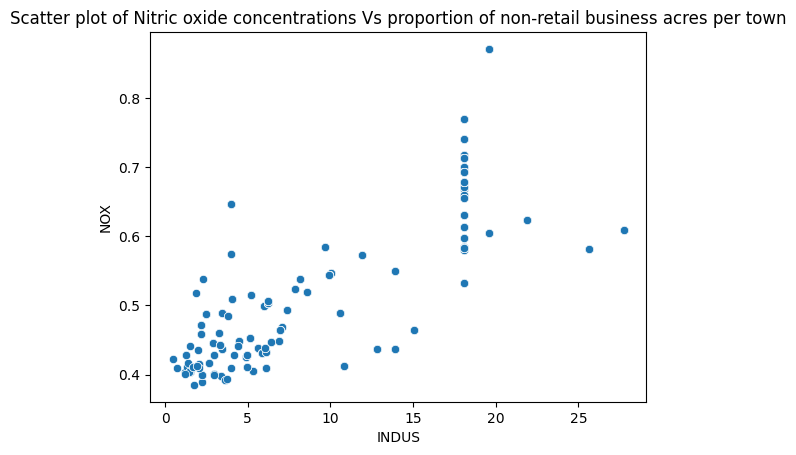

In [13]:
# scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
sns.scatterplot(y=boston_df['NOX'],x=boston_df['INDUS'],data=boston_df)
pyplot.title("Scatter plot of Nitric oxide concentrations Vs proportion of non-retail business acres per town")
pyplot.show()

In [14]:
# Conclusion:
# there is a relationship 
# for less  proportion of non-retail business acres per town nitric oxide concentration is also low like they are directly propotional 

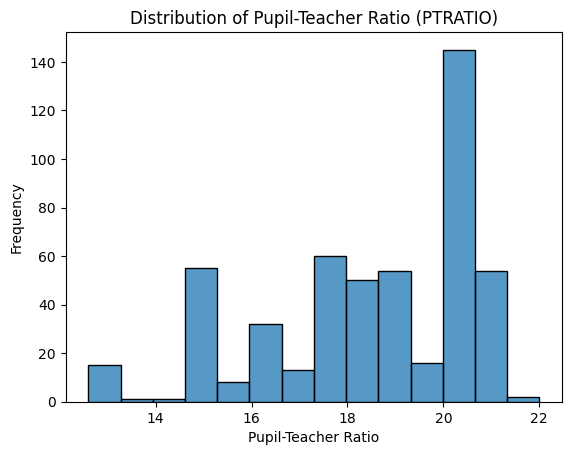

In [11]:
# histogram for the pupil to teacher ratio variable
sns.histplot(x=boston_df['PTRATIO'],data=boston_df,kde=False)
pyplot.title('Distribution of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

In [ ]:
# Q-1
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Null hypothesis - There is no significant difference betwee median value of houses bounded by the Charles river or not
# Alternate hypothesis - There is significant difference betwee median value of houses bounded by the Charles river or not


In [19]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'],equal_var = True)


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [20]:
# Conclusion :
# pvalue is less than alpha(0.05) so we reject null hypothesis means 
# there is significance difference in median value of houses based on bounded by charles river or not

In [13]:
# Q-2 
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Null-hypothesis - The means of MEDV across different age_group categories are equal.
# Alternate-hypothesis - At least one age group's mean MEDV is significantly different from the others

In [22]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [ ]:
#Conclusion:
# p value is less than alpha(0.05) means we reject null hypothesis as there is significant proof that
# there is difference in one age group's mean MEDV compare to others

In [24]:
# Q-3
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Null-hypothesis : There is no correlation between NOX and INDUS
# Alternate hypothesis : There is a linear correlation between NOX and INDUS 

In [25]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [26]:
# Conclusion : since p value is less than alpha(0.05) we reject null hypothesis and coclude that
# there exist a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town

In [27]:
# Q-4
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# Null-hypothesis : There is no relation between additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
# Aletrnate hypothesis :There is relation between additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [30]:
X=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predictions=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        14:51:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Conclusion :
# p value is less than alpha(0.05) so we reject null hypothesis and state there is significant 
# relation between additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
# regression coef for DIS is 1.09 positive that means there is positive association between them
# as the weighted distance to the five Boston employment centres increases, the median value of owner-occupied homes also increases